In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'economic_data_with_economy_label.csv'
data = pd.read_csv(file_path)

In [18]:
data

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,economy_label,action
0,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,Average Economy,buy
1,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,Bad Economy,buy
2,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,Good Economy,buy
3,1956,32.815013,-13.784416,-5.064776,1.221581,3.216954,Good Economy,sell
4,1957,-1.380315,1.127496,4.334827,-11.196782,3.049756,Average Economy,sell
...,...,...,...,...,...,...,...,...
66,2019,10.242900,5.918325,-5.549916,-2.422907,1.851285,Average Economy,buy
67,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,Bad Economy,buy
68,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,Good Economy,hold
69,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,Average Economy,sell


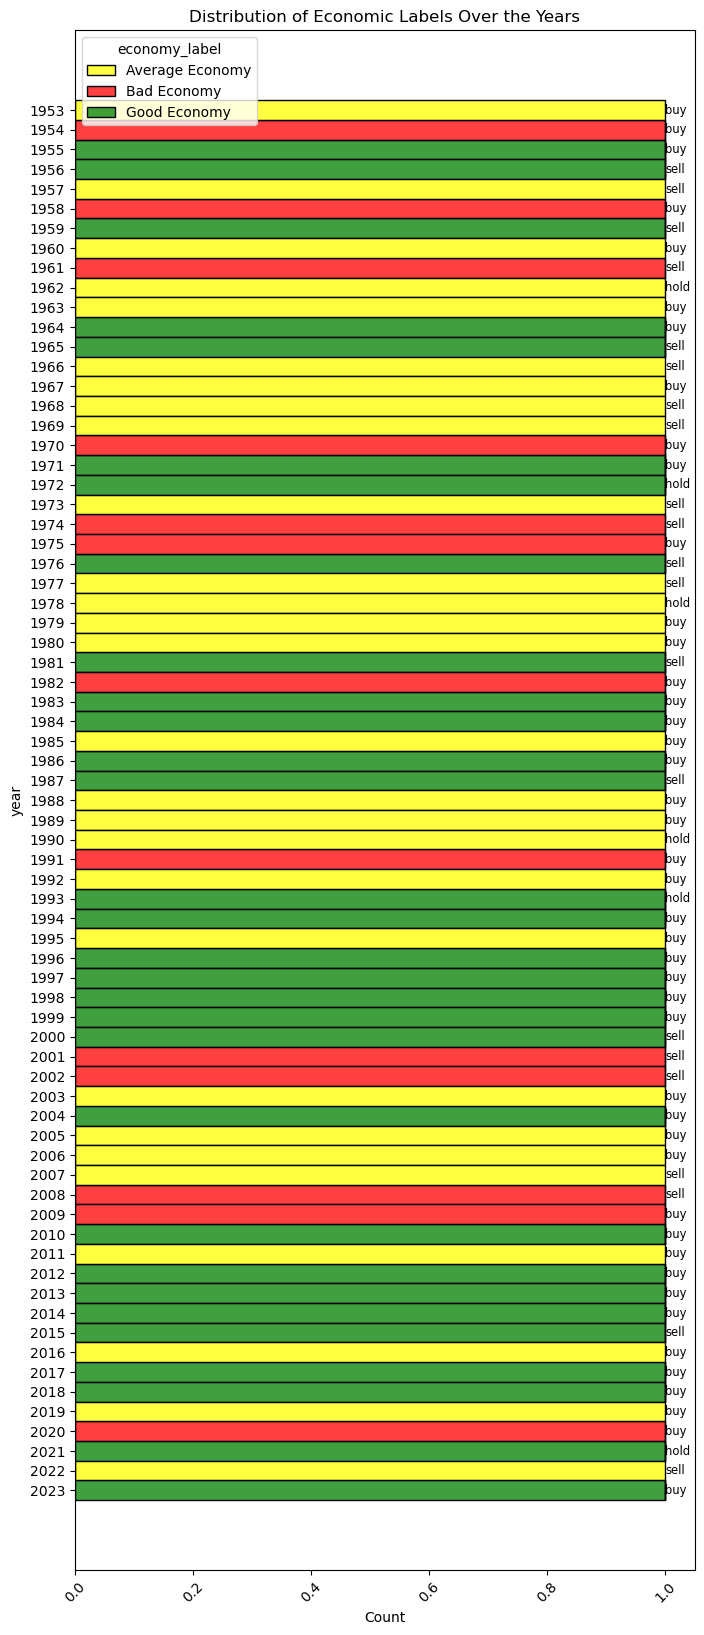

In [99]:
palette = {
    'Average Economy': 'yellow',
    'Bad Economy': 'red',
    'Good Economy': 'green'
}

plt.figure(figsize=(8, 20))
sns.histplot(data=data, y='year', hue='economy_label', palette=palette, bins=len(data['year'].unique()), multiple='stack', discrete=True)
plt.title('Distribution of Economic Labels Over the Years')
plt.gca().invert_yaxis()  

for year in data['year'].unique():
    yearly_data = data[data['year'] == year]
    actions = yearly_data['action'].values
    action_text = ', '.join(actions)
    plt.text(1, year, action_text, ha='left', va='center', size='small', color='black')

plt.yticks(data['year'].unique())  
plt.xticks(rotation=45)
plt.show()


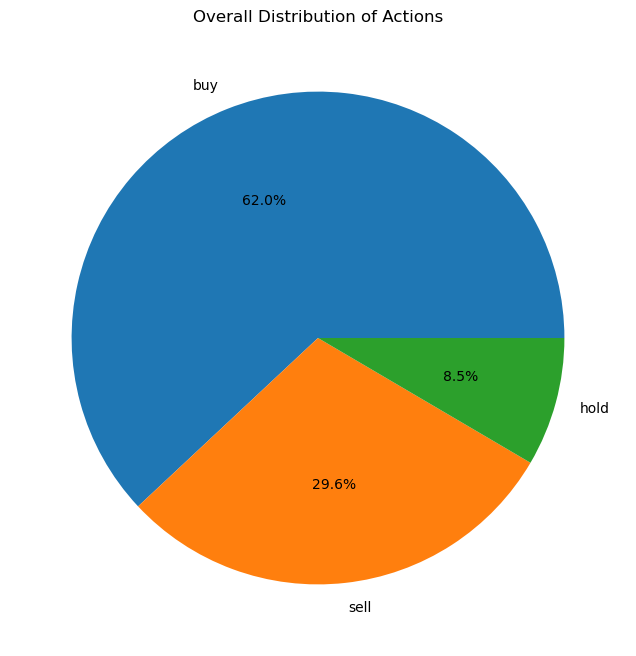

In [5]:
plt.figure(figsize=(8, 8))
data['action'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall Distribution of Actions')
plt.ylabel('')
plt.show()

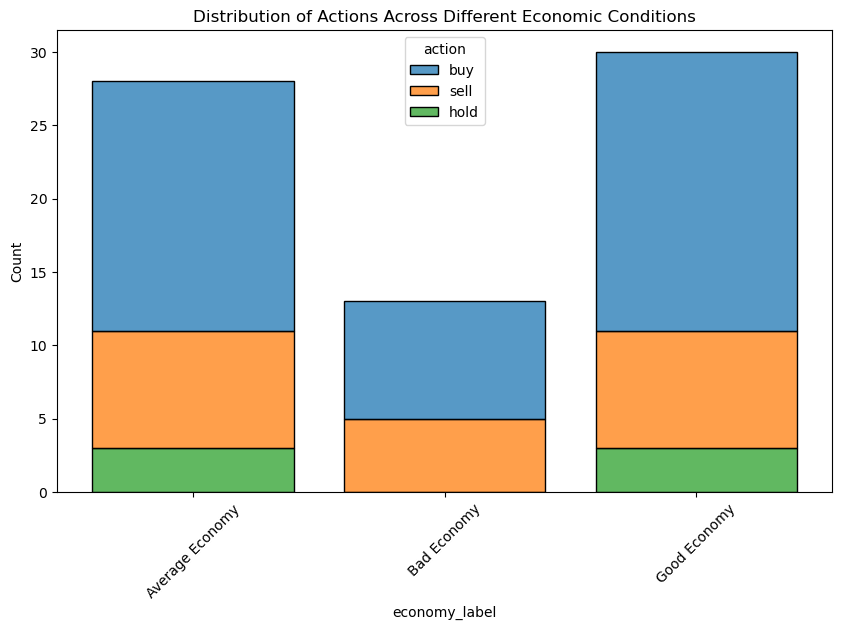

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='economy_label', hue='action', multiple='stack', shrink=0.8)
plt.title('Distribution of Actions Across Different Economic Conditions')
plt.xticks(rotation=45)
plt.show()


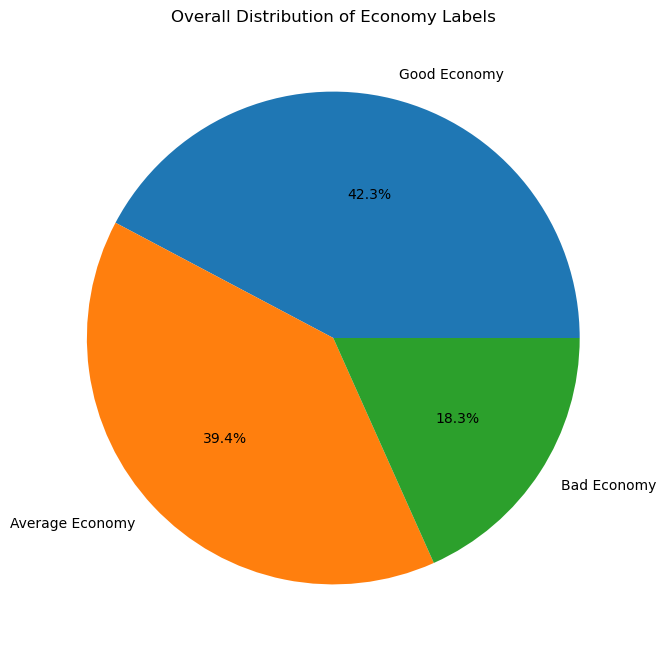

In [8]:
plt.figure(figsize=(8, 8))
data['economy_label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall Distribution of Economy Labels')
plt.ylabel('')
plt.show()

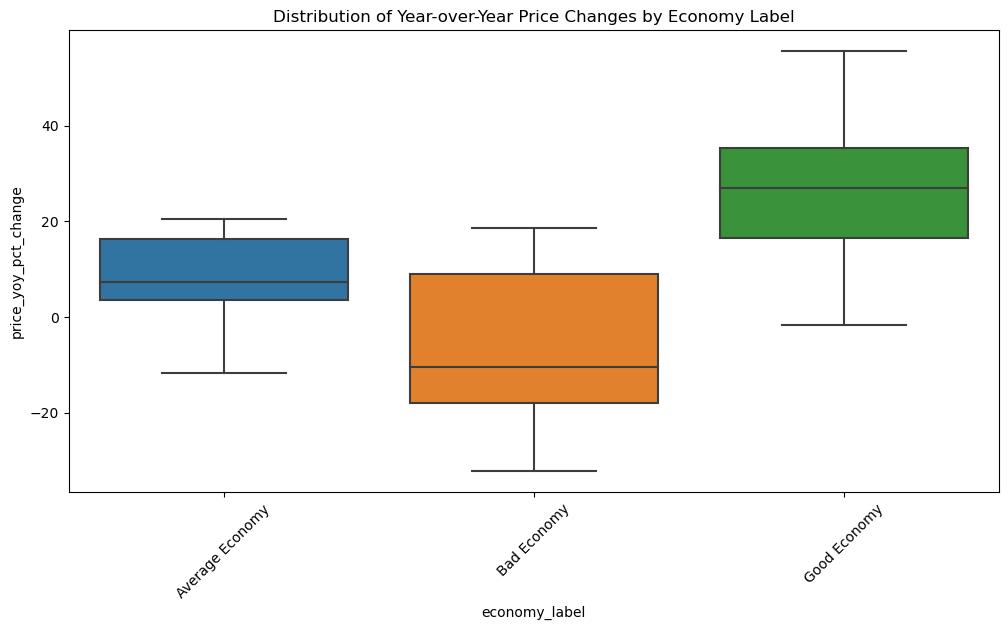

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='economy_label', y='price_yoy_pct_change', data=data)
plt.title('Distribution of Year-over-Year Price Changes by Economy Label')
plt.xticks(rotation=45)
plt.show()

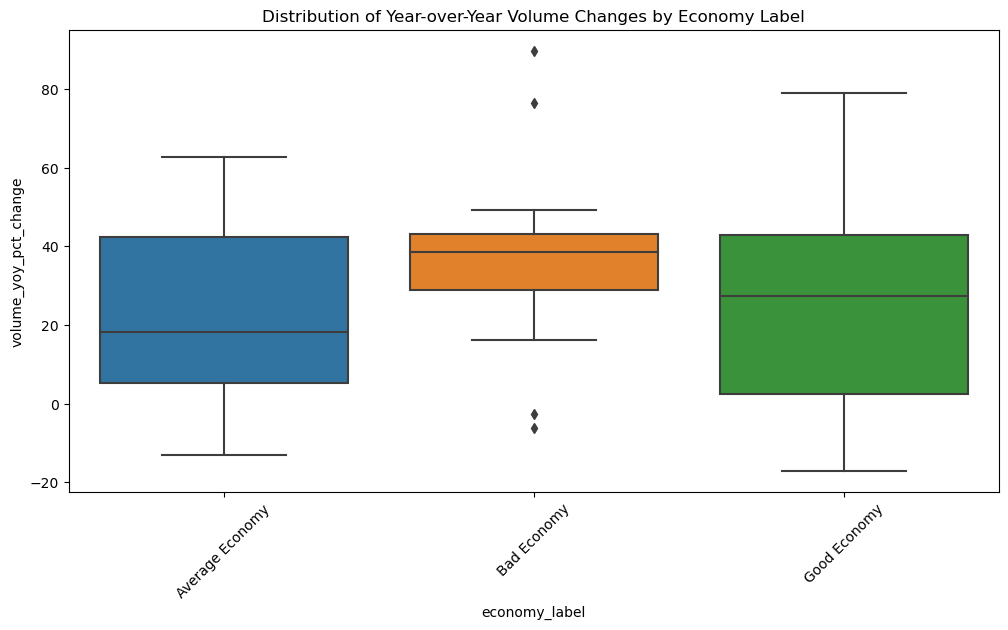

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='economy_label', y='volume_yoy_pct_change', data=data)
plt.title('Distribution of Year-over-Year Volume Changes by Economy Label')
plt.xticks(rotation=45)
plt.show()


In [13]:
summary_stats = data.groupby(['economy_label', 'action']).mean().reset_index()
summary_stats

,economy_label,action,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change
0,Average Economy,buy,1988.882353,9.486370,21.423970,-1.753056,-2.531447,3.500456
1,Average Economy,hold,1976.666667,5.223172,19.715694,-7.878796,-6.650696,4.834760
2,Average Economy,sell,1979.875000,6.917429,26.064390,-8.996993,-8.432048,4.471357
3,Bad Economy,buy,1982.375000,-3.318558,36.118717,60.781421,-3.876382,-1.472448
4,Bad Economy,sell,1989.200000,-12.316207,38.489246,21.309994,-11.887168,0.979742
5,Good Economy,buy,1996.736842,26.216199,24.119391,-6.883351,8.085345,3.603655
6,Good Economy,hold,1995.333333,24.731515,24.541259,-10.314485,5.428996,2.788340
7,Good Economy,sell,1979.875000,25.151675,28.644405,-8.918732,7.275674,4.346287


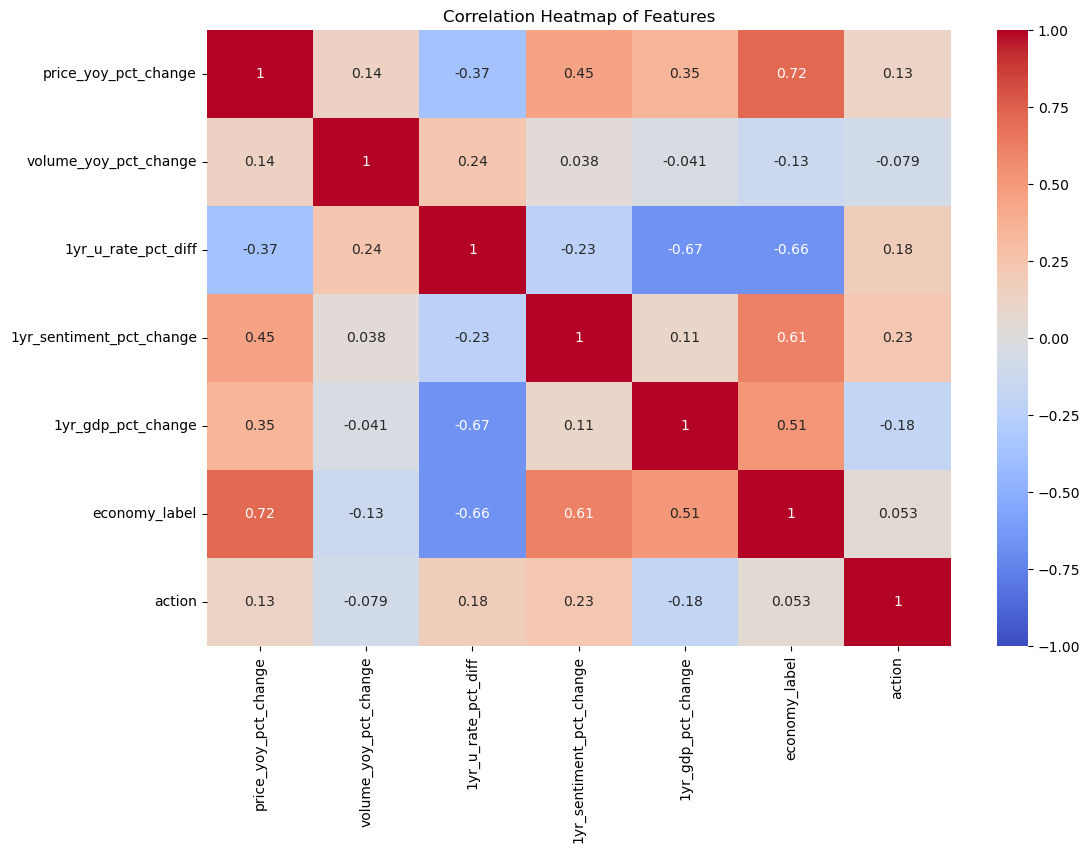

In [102]:
action_numeric = data['action'].map({'buy': 3, 'sell': 1, 'hold': 2})
economy_numeric = data['economy_label'].map({'Good Economy': 3, 'Average Economy': 2, 'Bad Economy': 1})
correlation_data = data.drop(['year'], axis=1)
correlation_data['action'] = action_numeric
correlation_data['economy_label'] = economy_numeric
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

In [105]:
correlation_data

,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,economy_label,action
0,4.972609,5.171929,-2.239049,-2.474865,6.189877,2,3
1,18.549472,76.504025,97.397452,-0.118953,-1.781925,1,3
2,55.606807,74.416946,-21.375729,16.990869,6.170199,3,3
3,32.815013,-13.784416,-5.064776,1.221581,3.216954,3,1
4,-1.380315,1.127496,4.334827,-11.196782,3.049756,2,1
...,...,...,...,...,...,...,...
66,10.242900,5.918325,-5.549916,-2.422907,1.851285,2,3
67,14.889219,38.676798,121.924519,-15.046015,1.226555,1,3
68,42.304832,8.150914,-17.346642,-4.813490,1.572607,3,2
69,9.473566,5.095595,-30.502669,-24.017608,3.565082,2,1


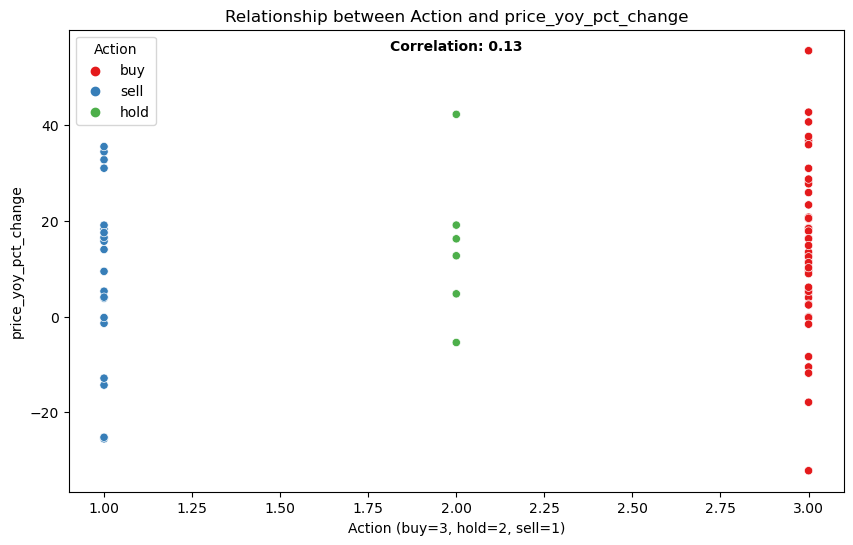

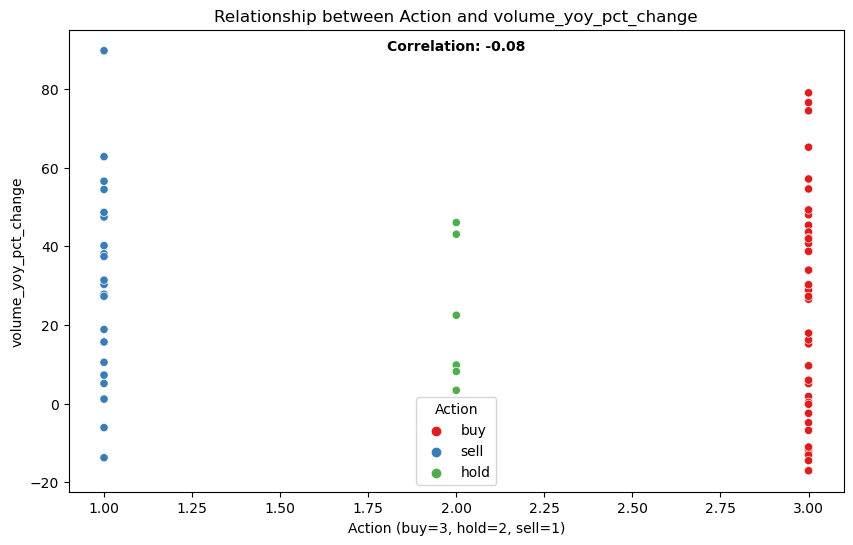

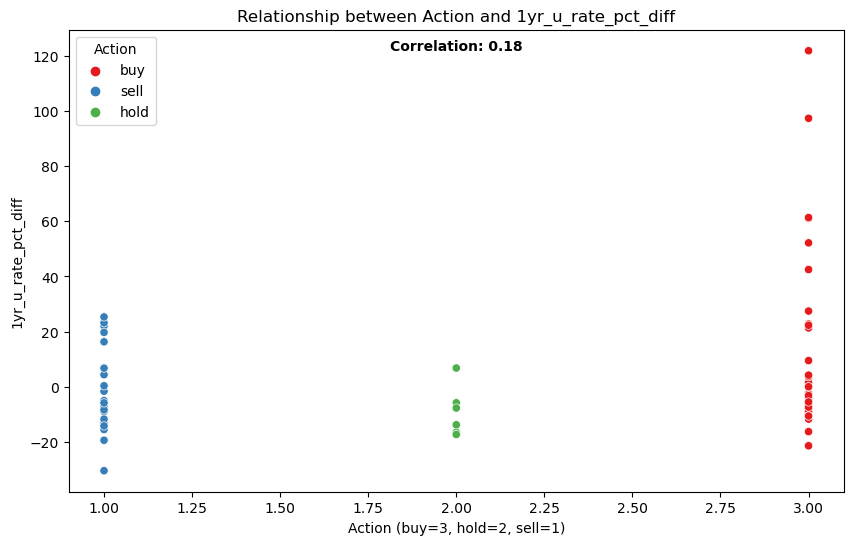

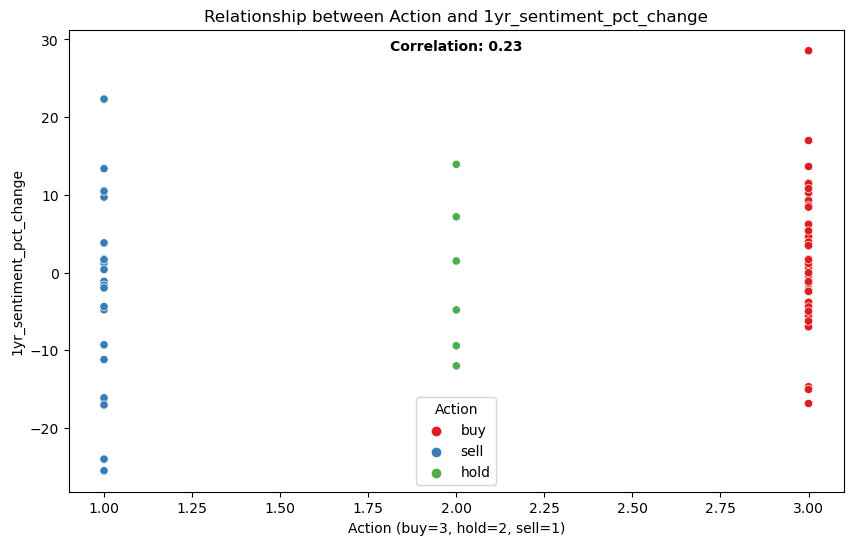

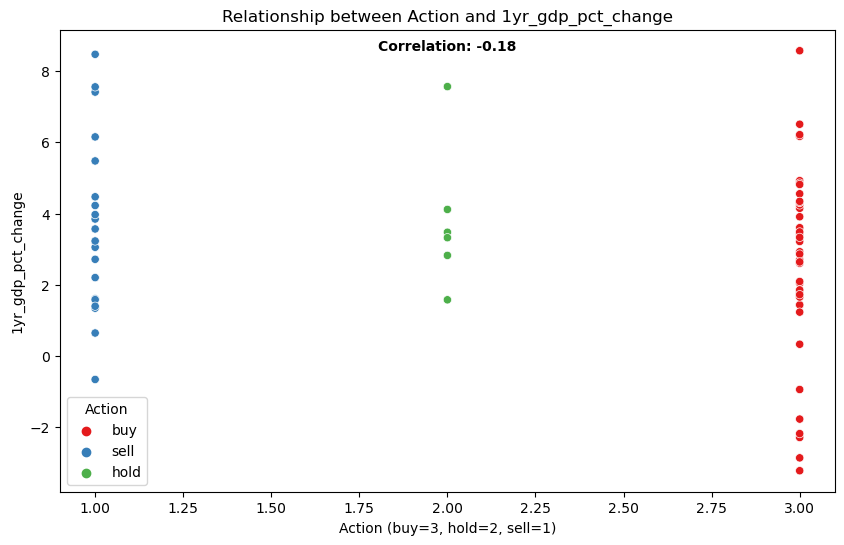

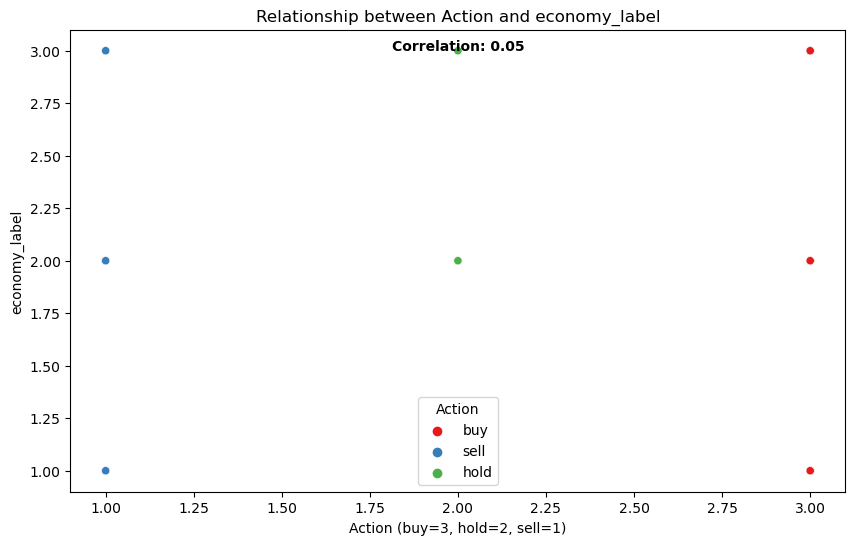

In [114]:
columns_to_plot = ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label']

# 산포도 그리기
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=action_numeric, y=correlation_data[column], hue=data['action'], palette='Set1')
    plt.title(f'Relationship between Action and {column}')
    
    # 상관계수 계산 및 표시
    correlation = correlation_data['action'].corr(correlation_data[column])
    plt.text(2, correlation_data[column].max(), f'Correlation: {correlation:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

    plt.xlabel('Action (buy=3, hold=2, sell=1)')
    plt.ylabel(column)
    plt.legend(title='Action')
    plt.show()